<H1> Capstone Project <:H1>

<H2> Case study : Fresh produce delivery to the hospitality sector in city centres<:H2>
        

In [ ]:
# import the required libraries
import numpy as np
import pandas as pd
import requests
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#!conda install -c conda-forge geopy --yes
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
#!pip install xlrd
import folium

print('Libraries imported')

Solving environment: | 

<H3> Part 1 : Collecting, cleaning and preparing the required data </H3>

In [3]:
#Get an overview of the Belgian postcodes and their Longitude/Latidude information

csv_path = "http://www.gemeentezoeker.be/MonkeyProof_postcodes_developer.csv"
PostCodeList = pd.read_csv(csv_path, sep=';', encoding='latin-1', header = None)
PostCodeList.head()

,0,1,2,3,4
0,1000,Brussel,50.842750,4.351550,"http://maps.google.com/maps?q=50.8427501,4.351..."
1,1000,Bruxelles,50.842750,4.351550,"http://maps.google.com/maps?q=50.8427501,4.351..."
2,1005,Ass. Réun. Com. Communau. Commune,NaN,NaN,NaN
3,1005,Brusselse Hoofdstedelijke Raad,50.844877,4.351433,http://maps.google.com/maps?q=50.8448767999999...
4,1005,Conseil Region Bruxelles-Capitale,50.847857,4.367408,"http://maps.google.com/maps?q=50.847857,4.3674..."


In [4]:
# Add column headers and remove the columns that are not required
headers=["PostalCode","Neighborhood","Latitude","Longitude","GoogleMap"]
PostCodeList.columns=headers
PostCodeList.drop("GoogleMap",axis=1,inplace=True)
PostCodeList.head()

,PostalCode,Neighborhood,Latitude,Longitude
0,1000,Brussel,50.842750,4.351550
1,1000,Bruxelles,50.842750,4.351550
2,1005,Ass. Réun. Com. Communau. Commune,NaN,NaN
3,1005,Brusselse Hoofdstedelijke Raad,50.844877,4.351433
4,1005,Conseil Region Bruxelles-Capitale,50.847857,4.367408


In [5]:
#Remove the Postal Codes that are not part of the Flemish region
PostCodeList = PostCodeList[~PostCodeList.iloc[:, 0].between(1000, 1999, inclusive=True)]
PostCodeList = PostCodeList[~PostCodeList.iloc[:, 0].between(4000, 7999, inclusive=True)]
PostCodeList['PostalCode'] = PostCodeList['PostalCode'].astype(int)
PostCodeList

,PostalCode,Neighborhood,Latitude,Longitude
344,2000,Antwerpen,51.219877,4.401136
345,2018,Antwerpen,51.203769,4.411264
346,2020,Antwerpen,51.189085,4.383628
347,2030,Antwerpen,51.276396,4.362460
348,2040,Berendrecht,51.342870,4.314090
349,2040,Lillo,51.304360,4.280260
350,2040,Zandvliet,51.359650,4.307160
351,2040,Antwerpen,51.341831,4.296460
352,2050,Antwerpen,51.228758,4.374022
353,2060,Antwerpen,51.229351,4.427988


In [6]:
# scrape the number of residents per city from www.metatopos.eu
# Read the HTML page 
page = requests.get("https://www.metatopos.eu/belgcombiN.html").text

# import the web scraping library and read the scrapped wikipedia page
from bs4 import BeautifulSoup
soup = BeautifulSoup(page,'lxml')

# The required table on the wikipedia page can be accessed via the tbody tag
My_table = soup.find('table')
My_table

<table>
<tr onmousedown="Sort(event)" title="Klik op een kolomkop om op die kolom te sorteren">
<td id="td1">Post-<br/>code</td>
<td id="td2">Gemeente</td>
<td id="td3">Deelgemeente</td>
<td id="td4">Provincie</td>
<td id="td5">Inwoners</td>
<td id="td6">Facili-<br/>teiten</td>
<td id="td7">Vertaling naam<br/>(deel)gemeente</td>
</tr>
<tr><td>1000</td><td><a href="https://www.google.be/maps/place/1000+Brussel/@50.8399304,4.3334137,13z" target="_blank">Brussel</a></td><td><br/></td><td>Brussels Hoofdstedelijk Gewest</td>
<td style="text-align: right;">178552</td>
<td>N+F</td>
<td>Bruxelles</td></tr>
<tr><td>1000</td><td><a href="https://www.google.be/maps/place/1000+Brussel/@50.8399304,4.3334137,13z" target="_blank">Bruxelles</a></td><td><br/></td><td>Brussels Hoofdstedelijk Gewest</td>
<td><br/></td>
<td>N+F</td>
<td>Brussel</td></tr>
<tr><td>1030</td><td><a href="https://www.google.be/maps/place/1030+Schaarbeek/@50.862503,4.3676991,14z" target="_blank">Schaarbeek</a></td><td><br/></td

In [7]:
# Parsing and Cleaning the collected data 
# Assign temporary variables to store the required data during scraping
PostalCode=[]
NumberOfResidents=[]
City=[]

for row in My_table.findAll('tr'):  # iterate through the rows to collect the row data (using tag 'tr')
#    for cell in row.findAll('td'):  # iterate through the cells for each row to collect the cel data (using tag 'td')
#         T = cell.findAll(text=True)  # find all text information in the html code and store in variable T
#         print(T)
    T = row.findAll(text=True)
    if T[0] != '\n':
        if T[4] != '\n':
            if T[1] != '\n':
                PostalCode.append(T[0])
                NumberOfResidents.append(T[4])
                City.append(T[1])
                
df=pd.DataFrame(PostalCode,columns=['PostalCode'])
df['Neighborhood']=City
df['NumberOfResidents']=NumberOfResidents
df['PostalCode'] = df['PostalCode'].astype(int)
df['NumberOfResidents'] = df['NumberOfResidents'].astype(int)

#Remove the Postal Codes that are not part of the Flemish region
df = df[~df.iloc[:, 0].between(1000, 1999, inclusive=True)]
df = df[~df.iloc[:, 0].between(4000, 7999, inclusive=True)]
df.head()

,PostalCode,Neighborhood,NumberOfResidents
80,2000,Antwerpen,517042
81,2070,Zwijndrecht,18957
82,2110,Wijnegem,9365
83,2150,Borsbeek,10540
84,2160,Wommelgem,12591


In [8]:
# We select the 100 cities with the highest number of residents

df = df.sort_values('NumberOfResidents', ascending=False)
df = df.head(100)
df

,PostalCode,Neighborhood,NumberOfResidents
80,2000,Antwerpen,517042
524,9000,Gent,257029
460,8000,Brugge,118053
150,3000,Leuven,99288
130,2800,Mechelen,84523
548,9300,Aalst,84329
181,3500,Hasselt,76685
475,8500,Kortrijk,75506
529,9100,Sint-Niklaas,75208
467,8400,Oostende,70600


In [9]:
#Merge the datasets containing the geo data and the number of residents data

SelectedCities = pd.merge(df,PostCodeList, how='inner',on=('PostalCode','Neighborhood'))
SelectedCities

,PostalCode,Neighborhood,NumberOfResidents,Latitude,Longitude
0,2000,Antwerpen,517042,51.219877,4.401136
1,9000,Gent,257029,51.067831,3.729091
2,8000,Brugge,118053,51.229934,3.202842
3,3000,Leuven,99288,50.881520,4.696758
4,2800,Mechelen,84523,51.025879,4.477537
5,9300,Aalst,84329,50.937793,4.040913
6,3500,Hasselt,76685,50.921517,5.344740
7,8500,Kortrijk,75506,50.819489,3.257708
8,9100,Sint-Niklaas,75208,51.155903,4.154426
9,8400,Oostende,70600,51.216667,2.900000


In [10]:
# Create a map of Flanders with the City superimposed on top 

# create the  map using folium
map_flanders = folium.Map(location=[51.037861,4.240528], zoom_start=10)

# add city markers on top
for lat, lng, city in zip(SelectedCities['Latitude'],SelectedCities['Longitude'],SelectedCities['Neighborhood']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_flanders)
    
map_flanders

<H3> Part 2 : Obtaining venue information from FourSquare </H3>

In [11]:
# The code was removed by Watson Studio for sharing.

In [12]:
#Define the function to explore the cities via Foursquare for a specific type of venue
def getNearbyVenues(categoryId, names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    categories_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            categoryId,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng']) for v in results])

        # return only relevant category information for each nearby venue and NOT AVAILABLE if Foursquare has no data
        for v in results:
            if v['categories']!= []:
                categories_list.append(v['categories'][0]['name'])
            else:
                categories_list.append('NOT AVAILABLE')
                
    #nearby_venues = pd.DataFrame(venues_list,columns=['Name','Latitude','Longitude','Venue','Venue_Lat','Venue_Lng'])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues['Category']=categories_list
        
    
    return(nearby_venues)

In [13]:
# Collect the "Food" data and store in a new dataframe
categoryIdStr = '4d4b7105d754a06374d81259'
FoodVenues = getNearbyVenues(categoryId=categoryIdStr,
                              names=SelectedCities['Neighborhood'],
                              latitudes=SelectedCities['Latitude'],
                              longitudes=SelectedCities['Longitude'])

Antwerpen
Gent
Brugge
Leuven
Mechelen
Aalst
Hasselt
Kortrijk
Sint-Niklaas
Oostende
Genk
Roeselare
Dendermonde
Beringen
Turnhout
Heist-op-den-Berg
Lokeren
Sint-Truiden
Geel
Ninove
Maasmechelen
Brasschaat
Waregem
Mol
Ieper
Lier
Evergem
Tienen
Schoten
Lommel
Knokke-Heist
Geraardsbergen
Heusden-Zolder
Menen
Bilzen
Wevelgem
Oudenaarde
Tongeren
Deinze
Houthalen-Helchteren
Aarschot
Temse
Brecht
Herentals
Izegem
Harelbeke
Ronse
Zottegem
Lanaken
Willebroek
Mortsel
Maaseik
Overijse
Wetteren
Westerlo
Zwevegem
Merelbeke
Diest
Maldegem
Oostkamp
Scherpenheuvel-Zichem
Nijlen
Zedelgem
Balen
Lochristi
Koksijde
Zoersel
Edegem
Tervuren
Zonhoven
Herent
Hoogstraten
Bornem
Kontich
Zele
Sint-Katelijne-Waver
Eeklo
Torhout
Dilsen-Stokkem
Wuustwezel
Aalter
Tielt
Blankenberge
Poperinge
Erpe-Mere
Kortenberg
Denderleeuw
Schilde
Middelkerke
Sint-Gillis-Waas
Zwijndrecht
Diepenbeek
Ranst
Lebbeke
Essen
Wervik
Stabroek


In [14]:
# Collect the Bar" data and store in a new dataframe
categoryIdStr = '4bf58dd8d48988d116941735'
BarVenues = getNearbyVenues(categoryId=categoryIdStr,
                              names=SelectedCities['Neighborhood'],
                              latitudes=SelectedCities['Latitude'],
                              longitudes=SelectedCities['Longitude'])

Antwerpen
Gent
Brugge
Leuven
Mechelen
Aalst
Hasselt
Kortrijk
Sint-Niklaas
Oostende
Genk
Roeselare
Dendermonde
Beringen
Turnhout
Heist-op-den-Berg
Lokeren
Sint-Truiden
Geel
Ninove
Maasmechelen
Brasschaat
Waregem
Mol
Ieper
Lier
Evergem
Tienen
Schoten
Lommel
Knokke-Heist
Geraardsbergen
Heusden-Zolder
Menen
Bilzen
Wevelgem
Oudenaarde
Tongeren
Deinze
Houthalen-Helchteren
Aarschot
Temse
Brecht
Herentals
Izegem
Harelbeke
Ronse
Zottegem
Lanaken
Willebroek
Mortsel
Maaseik
Overijse
Wetteren
Westerlo
Zwevegem
Merelbeke
Diest
Maldegem
Oostkamp
Scherpenheuvel-Zichem
Nijlen
Zedelgem
Balen
Lochristi
Koksijde
Zoersel
Edegem
Tervuren
Zonhoven
Herent
Hoogstraten
Bornem
Kontich
Zele
Sint-Katelijne-Waver
Eeklo
Torhout
Dilsen-Stokkem
Wuustwezel
Aalter
Tielt
Blankenberge
Poperinge
Erpe-Mere
Kortenberg
Denderleeuw
Schilde
Middelkerke
Sint-Gillis-Waas
Zwijndrecht
Diepenbeek
Ranst
Lebbeke
Essen
Wervik
Stabroek


In [15]:
# Collect the "Hotel"  data and store in a new dataframe
categoryIdStr = '4bf58dd8d48988d1fa931735'
HotelVenues = getNearbyVenues(categoryId=categoryIdStr,
                              names=SelectedCities['Neighborhood'],
                              latitudes=SelectedCities['Latitude'],
                              longitudes=SelectedCities['Longitude'])

Antwerpen
Gent
Brugge
Leuven
Mechelen
Aalst
Hasselt
Kortrijk
Sint-Niklaas
Oostende
Genk
Roeselare
Dendermonde
Beringen
Turnhout
Heist-op-den-Berg
Lokeren
Sint-Truiden
Geel
Ninove
Maasmechelen
Brasschaat
Waregem
Mol
Ieper
Lier
Evergem
Tienen
Schoten
Lommel
Knokke-Heist
Geraardsbergen
Heusden-Zolder
Menen
Bilzen
Wevelgem
Oudenaarde
Tongeren
Deinze
Houthalen-Helchteren
Aarschot
Temse
Brecht
Herentals
Izegem
Harelbeke
Ronse
Zottegem
Lanaken
Willebroek
Mortsel
Maaseik
Overijse
Wetteren
Westerlo
Zwevegem
Merelbeke
Diest
Maldegem
Oostkamp
Scherpenheuvel-Zichem
Nijlen
Zedelgem
Balen
Lochristi
Koksijde
Zoersel
Edegem
Tervuren
Zonhoven
Herent
Hoogstraten
Bornem
Kontich
Zele
Sint-Katelijne-Waver
Eeklo
Torhout
Dilsen-Stokkem
Wuustwezel
Aalter
Tielt
Blankenberge
Poperinge
Erpe-Mere
Kortenberg
Denderleeuw
Schilde
Middelkerke
Sint-Gillis-Waas
Zwijndrecht
Diepenbeek
Ranst
Lebbeke
Essen
Wervik
Stabroek


In [16]:
# Add column headers
FoodVenues.columns = ['Neighborhood','Latitude','Longitude','Venue','VenueLat','VenueLng','Venue Category']
print(FoodVenues.shape)

(4742, 7)


In [17]:
# Add column headers
BarVenues.columns = ['Neighborhood','Latitude','Longitude','Venue','VenueLat','VenueLng','Venue Category']
print(BarVenues.shape)

(3488, 7)


In [18]:
# Add column headers
HotelVenues.columns = ['Neighborhood','Latitude','Longitude','Venue','VenueLat','VenueLng','Venue Category']
print(HotelVenues.shape)

(1287, 7)


In [26]:
# Merge the obtained data for hotels, bars and food venues into one dataset
AllVenues = pd.concat([FoodVenues,BarVenues,HotelVenues])
print(AllVenues.shape)
AllVenues.head()

(9517, 7)


,Neighborhood,Latitude,Longitude,Venue,VenueLat,VenueLng,Venue Category
0,Antwerpen,51.219877,4.401136,McDonald's,51.219702,4.401178,Fast Food Restaurant
1,Antwerpen,51.219877,4.401136,Starbucks,51.219770,4.400908,Coffee Shop
2,Antwerpen,51.219877,4.401136,Da Giovanni,51.219951,4.400756,Pizza Place
3,Antwerpen,51.219877,4.401136,Moochie Frozen Yoghurt,51.220036,4.402850,Frozen Yogurt Shop
4,Antwerpen,51.219877,4.401136,Brasserie Appelmans,51.219879,4.400717,Cocktail Bar


<H3> Part 3 : Data preperation and Feature Engineering </H3>

In [27]:
#Remove all venues that are of no interest to our analysis
VenuesToRemove = ('Candy Store','Convention Center','Corporate Cafeteria','Liquor Store','Truck Stop','Resort','Bagel Shop','Bakery','Bar','Bookstore','Bowling Alley','Brewery','Bubble Tea Shop','Butcher','Cheese Shop','Chocolate Shop','Community Center','Convenience Store','Coworking Space','Cupcake Shop','Deli / Bodega','Dessert Shop','Donut Shop','Drugstore','Estaminet','Event Space','Factory','Farmers Market','Fish Market','Food','Food & Drink Shop','Food Service','Food Stand','Food Truck','Fruit & Vegetable Store','Gas Station','Gift Shop','Gourmet Shop','Grocery Store','Ice Cream Shop','Laundromat','Laundry Service','Market','Music Store','Newsstand','Pastry Shop','Playground','Pop-Up Shop','Record Shop','Salon / Barbershop','Thrift / Vintage Store','Trattoria/Osteria','Wine Bar','Art Gallery','Beach','Bookstore','Brewery','Building','Concert Hall','Cultural Center','Cupcake Shop','Farm','Food Service','General Entertainment','Gift Shop','Gourmet Shop','Gym','Harbor / Marina','Historic Site','Plaza','Record Shop','Salon / Barbershop','Surf Spot','Theater','Thrift / Vintage Store','Toy / Game Store','Vape Store','Whisky Bar','Wine Bar','Wine Shop','Assisted Living','Bath House','Boarding House','Brewery','Event Space','Food','Forest','Hostel','Hotel Pool','Ice Cream Shop','Motel','Rest Area','Scenic Lookout','Student Center','Trailer Park','Vacation Rental')

for venue in VenuesToRemove:
    #DropList = AllVenues.index[AllVenues['Venue Category'] == venue].tolist()
    AllVenues = AllVenues[AllVenues['Venue Category'] != venue]

print(AllVenues.shape)

(5675, 7)


In [28]:
#Rename the Venue Categories to the predefined list
ToRename_Restaurant = ('Gluten-free Restaurant','Brazilian Restaurant','Arepa Restaurant','Caucasian Restaurant','Dumpling Restaurant','Indian Restaurant','Southern / Soul Food Restaurant','African Restaurant','American Restaurant','Argentinian Restaurant','Asian Restaurant','Australian Restaurant','BBQ Joint','Belgian Restaurant','Buffet','Cantonese Restaurant','Caribbean Restaurant','Chinese Restaurant','Comfort Food Restaurant','Dutch Restaurant','Eastern European Restaurant','Egyptian Restaurant','Empanada Restaurant','Falafel Restaurant','Fondue Restaurant','Food Court','French Restaurant','German Restaurant','Greek Restaurant','Halal Restaurant','Hawaiian Restaurant','Italian Restaurant','Japanese Restaurant','Latin American Restaurant','Mediterranean Restaurant','Mexican Restaurant','Middle Eastern Restaurant','Modern European Restaurant','Molecular Gastronomy Restaurant','Moroccan Restaurant','Noodle House','Pakistani Restaurant','Peruvian Restaurant','Poke Place','Portuguese Restaurant','Ramen Restaurant','Salad Place','Scandinavian Restaurant','Seafood Restaurant','Spanish Restaurant','Steakhouse','Sushi Restaurant','Tapas Restaurant','Tex-Mex Restaurant','Thai Restaurant','Theme Restaurant','Turkish Restaurant','Vegetarian / Vegan Restaurant','Vietnamese Restaurant')
ToRename_Pub = ('Apres Ski Bar','Bar','Beach Bar','Beer Bar','Beer Garden','Bowling Alley','Café','Club House','Cocktail Bar','Coffee Shop','Comedy Club','Ethiopian Restaurant','Event Space','Frozen Yogurt Shop','Gastropub','Gay Bar','Golf Course','Hookah Bar','Hotel Bar','Irish Pub','Jazz Club','Juice Bar','Karaoke Bar','Lounge','Music Venue','Nightclub','Other Nightlife','Pet Café','Pool Hall','Pub','Recreation Center','Rock Club','Sake Bar','Smoothie Shop','Social Club','Spa','Sports Bar','Tea Room','Theater','Tiki Bar')
ToRename_FastFood = ('Burrito Place','Bistro','Brasserie','Burger Joint','Cafeteria','College Cafeteria','Creperie','Diner','Doner Restaurant','Fast Food Restaurant','Fish & Chips Shop','Fried Chicken Joint','Friterie','Hot Dog Joint','Kebab Restaurant','Pie Shop','Pizza Place','Sandwich Place','Shawarma Place','Snack Place','Soup Place','Taco Place','Wings Joint')
ToRename_BreakFast = ('Bed & Breakfast','Breakfast Spot')

for venue in ToRename_Restaurant:
    AllVenues.loc[AllVenues['Venue Category'] == venue,'Venue Category']='Restaurant'
for venue in ToRename_Pub:
    AllVenues.loc[AllVenues['Venue Category'] == venue,'Venue Category']='Pub'
for venue in ToRename_FastFood:
    AllVenues.loc[AllVenues['Venue Category'] == venue,'Venue Category']='FastFood'
for venue in ToRename_BreakFast:
    AllVenues.loc[AllVenues['Venue Category'] == venue,'Venue Category']='BreakFast'
     
AllVenues.head()

,Neighborhood,Latitude,Longitude,Venue,VenueLat,VenueLng,Venue Category
0,Antwerpen,51.219877,4.401136,McDonald's,51.219702,4.401178,FastFood
1,Antwerpen,51.219877,4.401136,Starbucks,51.219770,4.400908,Pub
2,Antwerpen,51.219877,4.401136,Da Giovanni,51.219951,4.400756,FastFood
3,Antwerpen,51.219877,4.401136,Moochie Frozen Yoghurt,51.220036,4.402850,Pub
4,Antwerpen,51.219877,4.401136,Brasserie Appelmans,51.219879,4.400717,Pub


In [29]:
AllVenues.groupby('Neighborhood').count()

print('There are {} uniques categories.'.format(len(AllVenues['Venue Category'].unique())))


There are 5 uniques categories.


In [30]:
AllVenues.groupby('Neighborhood').count()

,Latitude,Longitude,Venue,VenueLat,VenueLng,Venue Category
Neighborhood,,,,,,
Aalst,70,70,70,70,70,70
Aalter,52,52,52,52,52,52
Aarschot,58,58,58,58,58,58
Antwerpen,118,118,118,118,118,118
Balen,7,7,7,7,7,7
Beringen,42,42,42,42,42,42
Bilzen,60,60,60,60,60,60
Blankenberge,99,99,99,99,99,99
Bornem,52,52,52,52,52,52


In [31]:
# Analyze Each Neighborhood 
# one hot encoding
Venues_onehot = pd.get_dummies(AllVenues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Venues_onehot['Neighborhood'] = AllVenues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Venues_onehot.columns[-1]] + list(Venues_onehot.columns[:-1])
Venues_onehot = Venues_onehot[fixed_columns]

Venues_onehot.head()

,Neighborhood,BreakFast,FastFood,Hotel,Pub,Restaurant
0,Antwerpen,0,1,0,0,0
1,Antwerpen,0,0,0,1,0
2,Antwerpen,0,1,0,0,0
3,Antwerpen,0,0,0,1,0
4,Antwerpen,0,0,0,1,0


In [32]:
# Group the venues per city and incorporate the weighted value for each of the categories
Venues_grouped = Venues_onehot.groupby('Neighborhood').sum().reset_index()
Venues_grouped_org=Venues_grouped
Venues_grouped['BreakFast']=Venues_grouped['BreakFast']*0.7
Venues_grouped['Pub']=Venues_grouped['Pub']*0.3
Venues_grouped['Hotel']=Venues_grouped['Hotel']*1.5
Venues_grouped['Restaurant']=Venues_grouped['Restaurant']*1.3
Venues_grouped

,Neighborhood,BreakFast,FastFood,Hotel,Pub,Restaurant
0,Aalst,4.2,28,13.5,6.3,7.8
1,Aalter,2.1,21,3.0,3.6,18.2
2,Aarschot,0.0,18,3.0,5.4,26.0
3,Antwerpen,6.3,28,52.5,10.8,13.0
4,Balen,0.0,1,0.0,0.9,3.9
5,Beringen,1.4,15,3.0,2.4,19.5
6,Bilzen,3.5,19,3.0,5.1,22.1
7,Blankenberge,2.8,18,48.0,8.1,23.4
8,Bornem,1.4,25,10.5,2.4,13.0
9,Brasschaat,0.7,17,6.0,6.6,27.3


In [33]:
num_top_venues = 5

for hood in Venues_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Venues_grouped[Venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))

----Aalst----
        venue  freq
0    FastFood  28.0
1       Hotel  13.5
2  Restaurant   7.8
3         Pub   6.3
4   BreakFast   4.2
----Aalter----
        venue  freq
0    FastFood  21.0
1  Restaurant  18.2
2         Pub   3.6
3       Hotel   3.0
4   BreakFast   2.1
----Aarschot----
        venue  freq
0  Restaurant  26.0
1    FastFood  18.0
2         Pub   5.4
3       Hotel   3.0
4   BreakFast   0.0
----Antwerpen----
        venue  freq
0       Hotel  52.5
1    FastFood  28.0
2  Restaurant  13.0
3         Pub  10.8
4   BreakFast   6.3
----Balen----
        venue  freq
0  Restaurant   3.9
1    FastFood   1.0
2         Pub   0.9
3   BreakFast   0.0
4       Hotel   0.0
----Beringen----
        venue  freq
0  Restaurant  19.5
1    FastFood  15.0
2       Hotel   3.0
3         Pub   2.4
4   BreakFast   1.4
----Bilzen----
        venue  freq
0  Restaurant  22.1
1    FastFood  19.0
2         Pub   5.1
3   BreakFast   3.5
4       Hotel   3.0
----Blankenberge----
        venue  freq
0       H

In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Venues_grouped['Neighborhood']

for ind in np.arange(Venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Venues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Aalst,FastFood,Hotel,Restaurant,Pub,BreakFast
1,Aalter,FastFood,Restaurant,Pub,Hotel,BreakFast
2,Aarschot,Restaurant,FastFood,Pub,Hotel,BreakFast
3,Antwerpen,Hotel,FastFood,Restaurant,Pub,BreakFast
4,Balen,Restaurant,FastFood,Pub,Hotel,BreakFast
5,Beringen,Restaurant,FastFood,Hotel,Pub,BreakFast
6,Bilzen,Restaurant,FastFood,Pub,BreakFast,Hotel
7,Blankenberge,Hotel,Restaurant,FastFood,Pub,BreakFast
8,Bornem,FastFood,Restaurant,Hotel,Pub,BreakFast
9,Brasschaat,Restaurant,FastFood,Pub,Hotel,BreakFast


<H3> Part 4 : Modelling </H3>

Text(0, 0.5, 'Sqaured Error (Cost)')

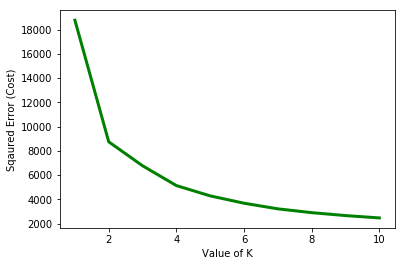

In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt
Venues_grouped_clustering = Venues_grouped.drop('Neighborhood', 1)
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters=i, random_state=0).fit(Venues_grouped_clustering)
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
#plt.show() # clear the plot 
  
# the point of the elbow is the  
# most optimal value for choosing k 

<H3> Part 5 : K-means clustering </H3>

In [38]:
# set number of clusters
kclusters = 2

Venues_grouped_clustering = Venues_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Venues_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int32)

In [39]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

SelectedCities_merged = SelectedCities

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
SelectedCities_merged = SelectedCities_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

SelectedCities_merged.head() # check the last columns!

,PostalCode,Neighborhood,NumberOfResidents,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,2000,Antwerpen,517042,51.219877,4.401136,0,Hotel,FastFood,Restaurant,Pub,BreakFast
1,9000,Gent,257029,51.067831,3.729091,0,Restaurant,Hotel,FastFood,BreakFast,Pub
2,8000,Brugge,118053,51.229934,3.202842,1,Restaurant,FastFood,BreakFast,Hotel,Pub
3,3000,Leuven,99288,50.881520,4.696758,0,Hotel,FastFood,Restaurant,BreakFast,Pub
4,2800,Mechelen,84523,51.025879,4.477537,0,Hotel,Restaurant,FastFood,BreakFast,Pub


In [40]:
# create map
map_clusters = folium.Map(location=[51.037861,4.240528], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(SelectedCities_merged['Latitude'], SelectedCities_merged['Longitude'], SelectedCities_merged['Neighborhood'], SelectedCities_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
  
map_clusters


<H3> Part 6 : Results </H3>

In [41]:
#Cluster 1
SelectedCities_merged.loc[SelectedCities_merged['Cluster Labels'] == 0, SelectedCities_merged.columns[[1] + list(range(5, SelectedCities_merged.shape[1]))]]


,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Antwerpen,0,Hotel,FastFood,Restaurant,Pub,BreakFast
1,Gent,0,Restaurant,Hotel,FastFood,BreakFast,Pub
3,Leuven,0,Hotel,FastFood,Restaurant,BreakFast,Pub
4,Mechelen,0,Hotel,Restaurant,FastFood,BreakFast,Pub
6,Hasselt,0,Restaurant,FastFood,Hotel,BreakFast,Pub
7,Kortrijk,0,Hotel,FastFood,Restaurant,Pub,BreakFast
9,Oostende,0,Hotel,FastFood,Restaurant,BreakFast,Pub
10,Genk,0,Restaurant,FastFood,Hotel,Pub,BreakFast
24,Ieper,0,Hotel,FastFood,Restaurant,BreakFast,Pub
30,Knokke-Heist,0,Hotel,FastFood,Restaurant,Pub,BreakFast


In [42]:
#Cluster 2 - 
SelectedCities_merged.loc[SelectedCities_merged['Cluster Labels'] == 1, SelectedCities_merged.columns[[1] + list(range(5, SelectedCities_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Brugge,1,Restaurant,FastFood,BreakFast,Hotel,Pub
5,Aalst,1,FastFood,Hotel,Restaurant,Pub,BreakFast
8,Sint-Niklaas,1,FastFood,Restaurant,Hotel,Pub,BreakFast
11,Roeselare,1,FastFood,Restaurant,Hotel,Pub,BreakFast
12,Dendermonde,1,FastFood,Restaurant,Pub,BreakFast,Hotel
13,Beringen,1,Restaurant,FastFood,Hotel,Pub,BreakFast
14,Turnhout,1,FastFood,Restaurant,Hotel,Pub,BreakFast
15,Heist-op-den-Berg,1,FastFood,Restaurant,Pub,Hotel,BreakFast
16,Lokeren,1,FastFood,Restaurant,Hotel,Pub,BreakFast
17,Sint-Truiden,1,FastFood,Restaurant,Hotel,Pub,BreakFast
